# Random Forest

The random forest type-classification method is an *ensemble* method, which means that multiple simpler classifiers are trained and the predictions made by these multitudes are then used to make one final prediction. In the case of the random forest algorithm each simpler classifier is a decision tree trained on different subsets of the data. So the decision tree is the heart of the random forest algorithm (and where the name comes from). It's good to read and learn about random forest because it prepares you to understand ensemble methods more generally. 

A decision tree is a type of flow-chart, it is a very simple rule set and occupies a place near the center of canonical forms of computational automata. It takes an input and then based on that input it takes another action. For a decision tree classifier it takes one of the features in your data point and asks a true/false questions (e.g. "is X>C?"") if depending on the answer it will do one of three things: 1) ask a different question about the same feature (e.g. "is X>C+1?"), or 2) ask any question about a different feature (e.g. "is Y>C?"), or 3) make a prediction. 

<img src="https://raw.githubusercontent.com/jojker/PML_Workshops/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/Dec_tree_example.png" width=500 > 

There are many algorithms to efficiently train decision trees. Typically a tree is "grown" by guessing at a criterion (feature + question about that feature + actions) where the action to be taken is to divide your data into two groups. For a classifier, the first step is to classify your data based on one property of one feature. When it finds the best single criterion it keeps it and then repeats the process for each of the two groups.  After dividing and subdividing many times it is likely that the model has over-fit. It is possible it has produced one criterion for each data point! So the tree is also pruned as it grows. The algorithm usually picks a criterion, and rather than passing results to subseqent tests it experiments with replacing the criterion with a classification label. It picks the label which corresponds to the most frequent outcome after all the subsequent guesses. If this results in an acceptable reduction in classification ability on the data used for training than the experiment is a success and that criterion and all it's subsequent criterion are removed. 

A random forest is grown by passing different subsets of your training data to different trees. If the subsets are allowed to overlap the process of dividing the training data is called "bootstrapping". Often "boosting" is also used. In this context, boosting means that the data points which are most frequently mis-labeled are collected and a decision tree is trained just on those. More generally boosting is any process in which a poor classifier is enhanced to create a good classifier. For ensemble methods the members of the ensemble do not have to be strong classifiers and taking measures to strengthen the *individual* members of the ensemble does not always improve wholistic ensemble performance. The errors in "weak learners" tend not to be systematic, therefore they cancel each other. The errors in strong learners often *are* systematic so you may not get the same % boost by combining several strong learners as you do when you combine weak learners. 

<img src="https://raw.githubusercontent.com/jojker/PML_Workshops/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/Rand_forest_explained.png" width=1600 > 

**NOTE:** The proper terminology uses "nodes", "branches", and "leaves". A "node" is a feature plus question, a "branch" represents an answer to that question and connects to an "action" which is another node. If the "action" is to assign a label this is called a "leaf node". It's admirable that so many people have devoted themselves to an extended metaphor, but the meaning of such language is only obvious in retrospect. 

[Article with more information on random forest](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d)

[Article with more information about decision trees](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)

[Article with more information about ensemble methods](https://towardsdatascience.com/an-intro-to-ensemble-learning-in-machine-learning-5ed8792af72d)

[sklearn random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

[sklearn random forest classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Naive Bayes


<img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/Bayes_rule.png" width=400 > 

Naive bayes is very simple, you are given a labeled data set and you simply estimate empirical PDFs for the labels and for the features. You can then use Bayes theorem to make predictions. It may be necessary to perform dimensionality reduction or change of basis. Also it is frequently the case that your variables are not Gauss distributed but the algorithm assumes that. So if you are using such an algorithm you will need to transform your features to become normally distributed. 

<img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/likelihood_table.png" width=800 > 

[Article explaining Naive Bayes](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)

[sklearn naive bayes classification](https://scikit-learn.org/stable/modules/naive_bayes.html)

# Support Vector Machine

It's hard to find a truly simple description of the SVM. Most article authors (even wikipedia) appear to be completely ignorant of the simple geometrical principles at work in the SVM. They skip straight to tersely stated expressions concerning the optimization function. It's almost as though the prejudicially expect it to be complicated and frusterating, so when their description is frusterating and vague, they just accept it as par-for-the-course. It isn't, the SVM is very simple and if you can understand SVM, Naive Bayes, and decision trees then all the other classifiers can appear as just mixing and matching concepts from both. 

**We need to define three basic objects**

$y_i \in \{-1,1\}$ the label of the data point $i$, the set of all labels is denoted $Y$

$\vec{x_i}$ A vector describing data point $i$, all $\vec{x_i}$ have the same dimension $D$, the set of all vectors is denoted $X$.

The set $\{\vec{w}, b\}$ contains the model parameters (AKA weights). $\vec{w}$ has dimension $D$.  The set $\{\vec{w}, b\}$ describes a hyperplane using "point-normal" form: $w_1z_1+...w_jz_j+...w_Dz_D=b$, where $\vec{z}$ is an arbitrary point on the hyperplane in the space spanned by $X$. 


**The goal is to find a $\vec{w}$ that defines a hyperplane which divides the data labeled "$-1$" from the data labeled "$1$".**

To do this we can leverage some simple geometrical reasoning:

Imagine a vector that ends at a specific data point, $\vec{x_i}$, and is orthogonal to and originates on the hyperplane at some point $\vec{p}$. Point-normal form means that $\vec{w}$ is a vector orthogonal to the hyperplane. So that we can find $\vec{p_i}$ with the simple expression: $\vec{p_i}=\vec{x_i}-a_i\vec{w}$ where $a_i$ is the key parameter which scales the orthogonal vector to hit our two points. If you treat each dimension separately, this is a system of $D$ equations with $D+1$ unknowns (the elements of $\vec{p_i}$ and also $a_i$). All we need is the equation of the hyperplane above to get the $D+1^{th}$ equation and solve this sytem for $a_i$. This expression is:

$a_i=(\vec{w}\cdot \vec{x_i} - b)/(\vec{w}\cdot\vec{w})$

This orthogonal vector, which connects data points to the separating hyperplane, is the "support vector". The critical insight is that if data point $\vec{x_i}$ is above the hyperplane then $a_i>0$, whereas $a_i<0$ for data points below the plane. So the sign of $a_i$ can serve as our classification prediction. 

<img src=https://raw.githubusercontent.com/jojker/PML_Workshops/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/support_vector_plane.png width=300 >

Furthermore, if we multiply by the true labels we see that $a_iy_i>0$ for all correctly labeled points and $a_iy_i<0$ for all incorrectly labeled points. In practice SVM algorithms do all their optimization by minimizing the magnitude of $a_i$ for incorrect cases and ignoring it for correct cases. It is also the case we want to avoid over-fitting by minimizing the magnitude of $\vec{w}$, this incourages some of the elements to be zero and therefore some of the features (dimensions) we use in $X$ are ignored. 


The function to minimized is the following:

$\left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\vec{w}\cdot \vec{x_i} - b)\right) \right] + \lambda\lVert \vec{w} \rVert^2$

The power of the SVM can be greatly extended if we perform a non-linear transformation on the dimensions of $X$ before assigning coefficients. This transformation is called  a "kernel". This lets us cast a problem where the points are not linearly separable to one where the are. The most common choices are the "radial basis function" which lets us use spherical-shells instead of planes, polynomials (multiplying dimensions together) which lets us accept boundarys that are not flat. In fact, if we use a sigmoid and change our optimization function to insist on precise values of $a_i$ for datapoints, correctly or incorrectly labeled, then we have turned an SVM into a single-layer neural network.

<img src=https://raw.githubusercontent.com/jojker/PML_Workshops/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/types_of_kernels.png width=800 >

[article explaining the SVM](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)

[sklearn random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

[sklearn random forest classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

# Bayes Nets

Bayes Nets are a clear example of combining the Naive Bayes classifier with decision trees. This is not literaly how it works, but it's a good conceptual anchor. Where as Naive Bayes classifier simply considered all features, the Bayesian Belief Network considers only a few at a time and connects features with network, a series of relationships not unlike the branches of a decision tree (a directed acyclic graph). Unlike a decision tree multiple paths can be followed at any given time. If a feature is *missing* the analysis can still work because it uses the Bayes Algorithm propagate the probability of that feature's outcomes to other nodes in the tree. 


<img src=https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/Bayes_Net.jpg width=600 >

[article explaining Bayesian belief nets](https://towardsdatascience.com/introduction-to-bayesian-networks-81031eeed94e)

[explainer for Bayesian belief nets implemented with pomegranate](https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html)

[tutorial for learning the structure of a belief network](https://colab.research.google.com/github/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb)

[tutorial for training the priors of a belief network](https://colab.research.google.com/github/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4_Bayesian_Networks.ipynb)

Note: pomegranate is good toolbox for markov models as well


# Linear Discriminant Analysis


Linear discriminant analysis has the unique property of being both a classification method, AND a dimensionality reduction algorith. It is a cousin of PCA (principal component analysis) and just like PCA, it assumes that each dimension of the data you feed into it are normally distributed. If this is not the case, it may still work. PCA is an eigen decomposition of the covariance matrix of the entire data set, this means that you cannot give it information about class labels. Because of this, PCA is not guaranteed to project to a subspace you will find interesting. LDA is the eigen decomposition of a slightly different matrix. One finds the covariance matrix limited to within-class comparisons, and then finds another matrix capturing how datapoints in different classes covaries. Then one multiplies these two matrices and *that* is what you do an eigen decomposition on. With LDA you may loose valuable information. All other classification methods based on matrix transformations or probability measures can be used as dimensionality reduction. However they will often create more distortion as we will see later on. 

<img src="https://github.com/jojker/PML_Workshops/raw/master/Summer%202019/Day%204%20-%20Goal%203%20-%20Identifying%2C%20Labeling%2C%20and%20Classifying/Ex%206%20-%20Simple%20classifiers/Data/lda_1.png" width=800>


[tutorial on LDA for dimensionality reduction](https://sebastianraschka.com/Articles/2014_python_lda.html#a-comparison-of-pca-and-lda)

[sklearn LDA classification](https://scikit-learn.org/stable/modules/lda_qda.html)

# comparing many classifiers

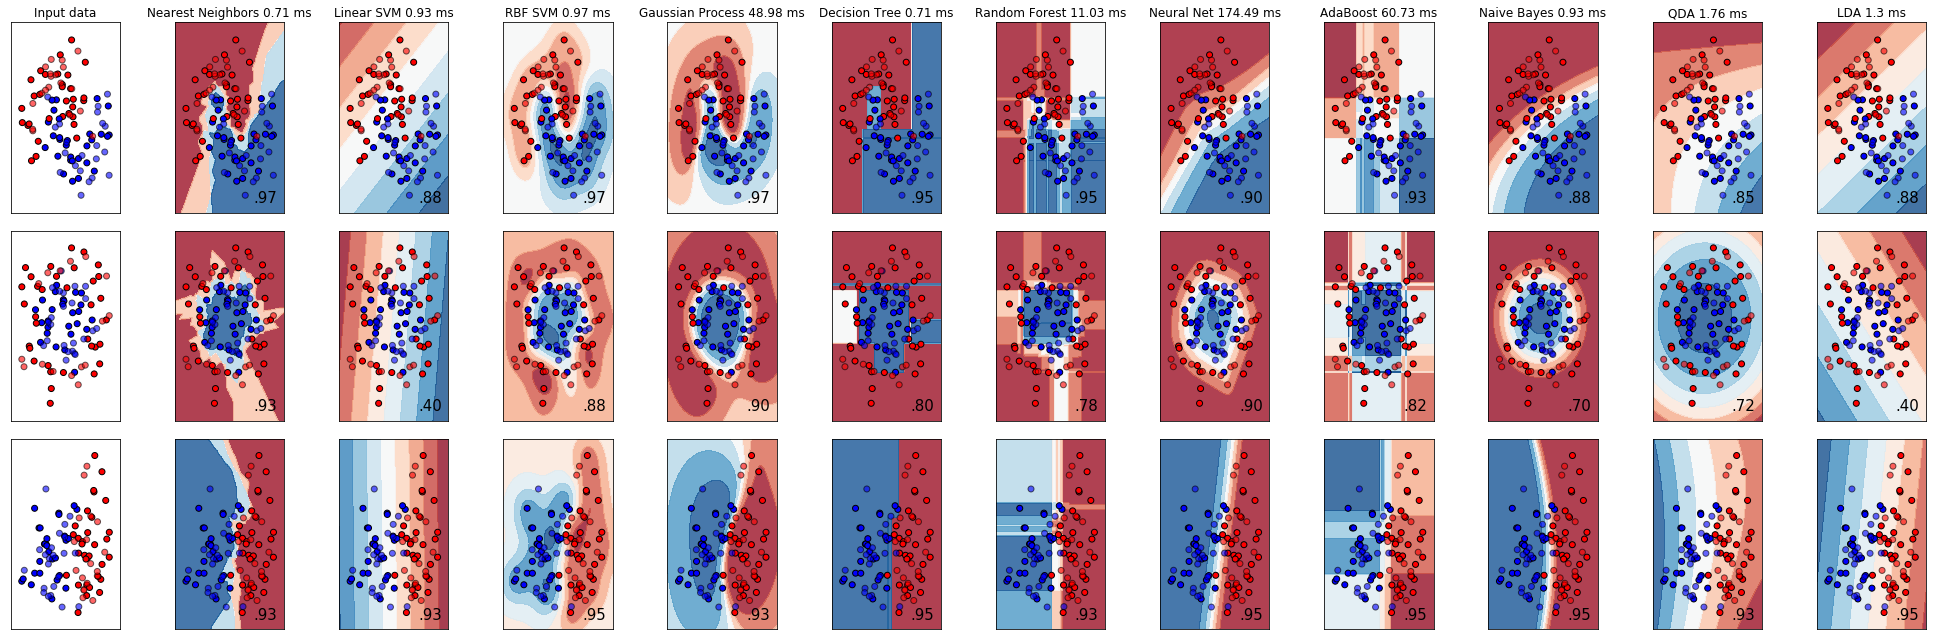

In [3]:

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        elapsed_time=time.time()
        clf.fit(X_train, y_train)
        elapsed_time=time.time()-elapsed_time
        name=name+" {} ms".format(round(100000*elapsed_time)/100)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Calibrating classifiers to output probabilities and using them as dimensionality reduction

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_multiclass.html#sphx-glr-auto-examples-calibration-plot-calibration-multiclass-py

[   93 12195  7712]
[   39 11515  8446]
[ 4282 15614   104]
[ 9306 10509   185]
[   34  9509 10423    34]
[18022  1978]
[6426 5264 8310]


Text(0.5, 0.92, 'random walk with potential wells')

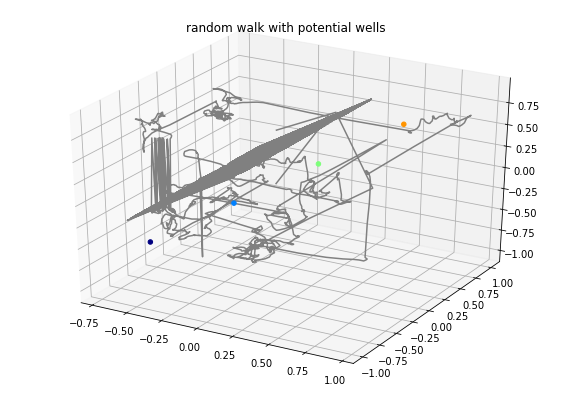

In [0]:
# identify 3 points in N space (N=100), these are 3 potential wells
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import datetime
import time


np.random.seed(int(time.time()))
Nwells=4 # MUST BE 4 OR HIGHER TO USE LDA
Ndims=7;
friction=0.6
proportionality=0.0001
bump_strength=abs(50*proportionality)



well_locs=np.tile(np.linspace(2/(Nwells+1)-1,1-2/(Nwells+1),Nwells),(Ndims,1))
# The gradient (of velocity) is inversely proportional to the distance to the 3 points
def calc_grad(current_loc,well_locs,proportionality):
  if len(current_loc.shape)!=2:
    current_loc=np.expand_dims(current_loc,axis=1)
  displacement=well_locs-current_loc;
  distances=np.linalg.norm(displacement,axis=0)
  grad=np.sum(proportionality/displacement,axis=1)
  return np.expand_dims(grad,axis=1)

# an object is on on a random walk in this space, getting "bumps" every few timesteps plus the gradient from the wells
def new_loc(current_loc,vel_vec,grad,bump_strength):
  # fix numpy dimensions
  if len(current_loc.shape)!=2:
    current_loc=np.expand_dims(current_loc,axis=1)
  if len(vel_vec.shape)!=2:
    vel_vec=np.expand_dims(vel_vec,axis=1)
  # get a random walk bump
  bump = np.random.normal(scale=bump_strength,size=current_loc.shape)
  # apply friction to the inertial velocity vector
  vel_vec=friction*vel_vec
  # combine well potential with inertia and a bump
  vel_vec=np.sum(np.hstack((vel_vec,grad,bump)),axis=1)
  if len(vel_vec.shape)!=2:
    vel_vec=np.expand_dims(vel_vec,axis=1)
    
  # check for violating a hard speed limit
  speed_limit_check=abs(vel_vec)>0.8
  if any(speed_limit_check):
    vel_vec[speed_limit_check]=vel_vec[speed_limit_check]/abs(vel_vec[speed_limit_check]/0.8)
    
  temp_new=np.sum(np.hstack((current_loc,vel_vec)),axis=1)
  bounds_check=abs(temp_new)>1
  if any(bounds_check):
    vel_vec[bounds_check]=-vel_vec[bounds_check]
    temp_new=np.sum(np.hstack((current_loc,vel_vec)),axis=1)
  bounds_check=abs(temp_new)>1
  return temp_new

# run for many timesteps
def run_simulation(initial_loc,Tmax,well_locs,proportionality,bump_strength):
  trajectory=np.zeros((initial_loc.shape[0],Tmax))
  vel_vec=np.zeros((initial_loc.shape[0],1))
  for t in range(Tmax-1):
    grad=calc_grad(initial_loc,well_locs,proportionality)
    trajectory[:,t]=new_loc(initial_loc,vel_vec,grad,bump_strength)
    vel_vec=trajectory[:,t]-initial_loc;
    initial_loc=trajectory[:,t]
  return trajectory
  
  
# get a trial where we have a close to even number of examples of each well
Tmax=20000
while True:
  initial_loc=2*(np.random.rand(Ndims,1)-0.5)
  trajectory=run_simulation(initial_loc,Tmax,well_locs,proportionality,bump_strength)

  # Identify moments in time very close to the three wells (un ambiguous)
  #mean_well_distance=np.mean(np.linalg.norm(np.hstack(tuple([well_locs-np.expand_dims(well_locs[:,i],axis=1) for i in range(well_locs.shape[1])] )),ord=2,axis=0))
  mean_well_distance=np.linalg.norm(np.expand_dims(well_locs[:,0],axis=1)-np.expand_dims(well_locs[:,1],axis=1),ord=2,axis=0)
  distance_threshold=1.3*mean_well_distance
  last_len=0

  distances=np.zeros((Nwells,Tmax))
  for well_ndx in range(well_locs.shape[1]):
    distances[well_ndx,:]=np.linalg.norm(trajectory-np.expand_dims(well_locs[:,well_ndx],axis=1),ord=2,axis=0)
  nearest_neighbor=np.expand_dims(np.argmin(distances,axis=0),axis=1).T

  _,class_counts=np.unique(nearest_neighbor,return_counts=True)
  if max(class_counts.shape)==Nwells and all(class_counts>100):
    break
  else:
    print(class_counts)

  
  
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot3D(trajectory[0,:], trajectory[1,:], trajectory[2,:], 'gray')
ax.scatter3D(well_locs[0,:], well_locs[1,:], well_locs[2,:], c=list(range(Nwells)), cmap='jet', vmin=0, vmax=Nwells, alpha = 1);
ax.set_title('random walk with potential wells')

In [0]:
# get a trial where we have a close to even number of examples of each well
Tmax=20000
while True:
  initial_loc=2*(np.random.rand(Ndims,1)-0.5)
  trajectory=run_simulation(initial_loc,Tmax,well_locs,proportionality,bump_strength)

  # Identify moments in time very close to the three wells (un ambiguous)
  #mean_well_distance=np.mean(np.linalg.norm(np.hstack(tuple([well_locs-np.expand_dims(well_locs[:,i],axis=1) for i in range(well_locs.shape[1])] )),ord=2,axis=0))
  mean_well_distance=np.linalg.norm(np.expand_dims(well_locs[:,0],axis=1)-np.expand_dims(well_locs[:,1],axis=1),ord=2,axis=0)
  distance_threshold=mean_well_distance
  last_len=0

  distances=np.zeros((Nwells,Tmax))
  for well_ndx in range(well_locs.shape[1]):
    distances[well_ndx,:]=np.linalg.norm(trajectory-np.expand_dims(well_locs[:,well_ndx],axis=1),ord=2,axis=0)
  nearest_neighbor=np.expand_dims(np.argmin(distances,axis=0),axis=1).T

  _,class_counts=np.unique(nearest_neighbor,return_counts=True)
  if max(class_counts.shape)==Nwells and all(class_counts>100):
    break
  else:
    print(class_counts)

distances=np.min(distances,axis=0)

# hand label some points using the distance threshold
classified_point_ndcs=np.where(distances<distance_threshold)[0]
classified_points=trajectory[:,classified_point_ndcs]  
point_labels=nearest_neighbor[:,classified_point_ndcs]  


[   30 10056  9914]


Text(0.5, 0.92, 'trajectory consisting of unlabeled points')

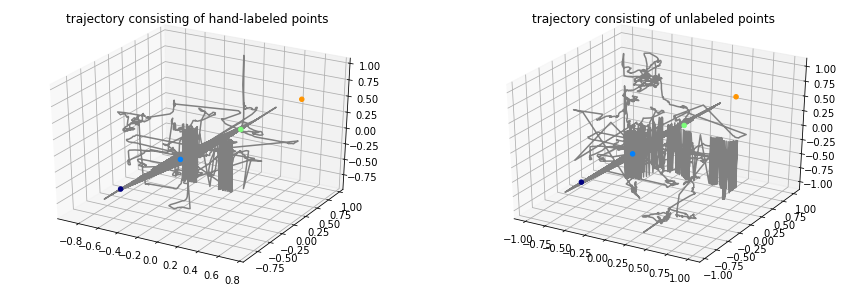

In [0]:

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121, projection='3d')
ax.plot3D(classified_points[0,:], classified_points[1,:], classified_points[2,:], 'gray')
ax.scatter3D(well_locs[0,:], well_locs[1,:], well_locs[2,:], c=list(range(Nwells)), cmap='jet', vmin=0, vmax=Nwells, alpha=1);
ax.set_title('trajectory consisting of hand-labeled points')


unclassified_points_ndcs=np.asarray(list(set(np.arange(Tmax)).symmetric_difference(set(classified_point_ndcs))))
unclassified_points=trajectory[:,unclassified_points_ndcs]

ax = fig.add_subplot(122, projection='3d')
ax.plot3D(unclassified_points[0,:], unclassified_points[1,:], unclassified_points[2,:], 'gray')
ax.scatter3D(well_locs[0,:], well_locs[1,:], well_locs[2,:], c=list(range(Nwells)), cmap='jet', vmin=0, vmax=Nwells, alpha=1);
ax.set_title('trajectory consisting of unlabeled points')

In [0]:

# build a classifier

classifier_type='LDA' # other options: 'SVM' 'RandFor'

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
## randomly permute the classified points
Nsamples=max(point_labels.shape)
success=False
while not success:
  new_ndcs=np.random.permutation(Nsamples)
  point_labels=np.expand_dims(point_labels[0,new_ndcs],axis=0)
  classified_points=classified_points[:,new_ndcs]
  classified_point_ndcs=classified_point_ndcs[new_ndcs]
  ## divide into a test set and a training set
  train_max=round(0.6*Nsamples)
  valid_max=round(0.8*Nsamples)
  coords_train, labels_train = classified_points[:,:train_max].T, point_labels[0,:train_max].T
  coords_valid, labels_valid = classified_points[:,train_max:valid_max].T, point_labels[0,train_max:valid_max].T
  coords_train_valid, labels_train_valid = classified_points[:,:valid_max].T, point_labels[0,:valid_max].T
  coords_test, labels_test = classified_points[:,valid_max:].T, point_labels[0,valid_max:].T
  success = np.array_equal(np.unique(labels_train),np.unique(labels_valid)) and np.array_equal(np.unique(labels_train),np.unique(labels_test))
  
  
## train the classifier and get the log loss
if classifier_type=='SVM':
  clf=SVC(kernel='rbf',C=1,probability=True)
if classifier_type=='LDA':
  clf=LinearDiscriminantAnalysis() #
if classifier_type=='RandFor':
  clf = RandomForestClassifier(n_estimators=25)
clf.fit(coords_train, labels_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

log loss score for an uncalibrated model: 0.0522037958457364


Text(0.5, 0.92, 'inherent manifold for unlabeled data')

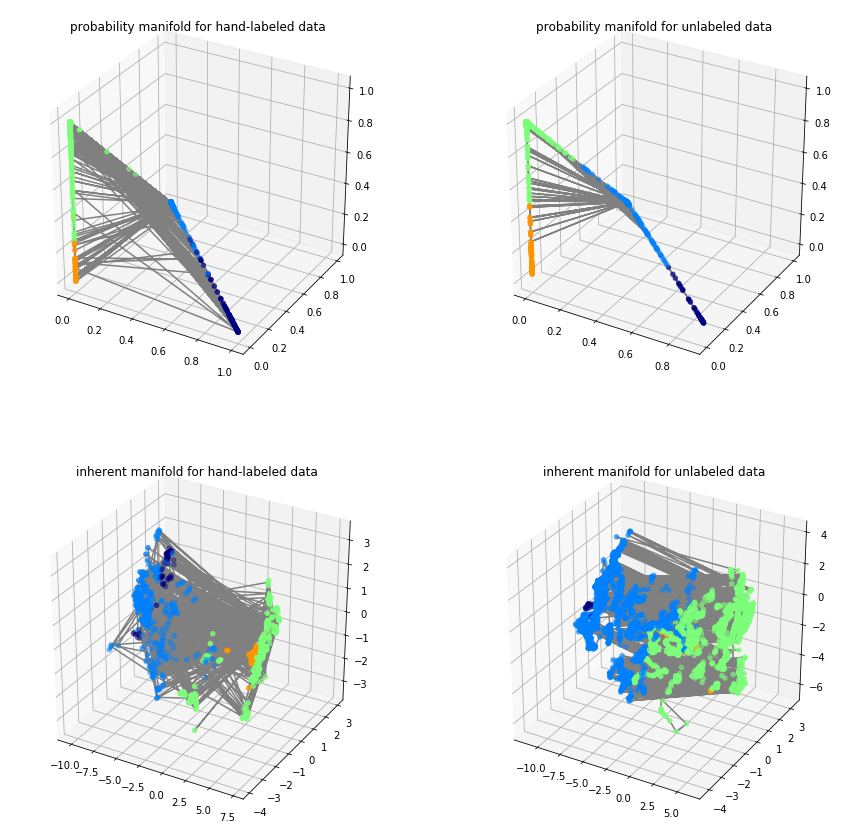

In [0]:
### THE MODEL IS CURRENTLY NOT CALIBRATED ###

# get the classification probabilities and print the score
clf_probs = clf.predict_proba(coords_test)
score = log_loss(labels_test, clf_probs,labels=np.unique(point_labels))
print("log loss score for an uncalibrated model: {}".format(score))



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221, projection='3d')
ax.plot3D(clf_probs.T[0,:], clf_probs.T[1,:], clf_probs.T[2,:], 'gray')
ax.scatter3D(clf_probs.T[0,:], clf_probs.T[1,:], clf_probs.T[2,:], c=labels_test, cmap='jet', vmin=0, vmax=Nwells);
ax.set_title('probability manifold for hand-labeled data') 

# get and plot the manifold inherent to the classifier
if classifier_type=='LDA':
  clf_probs = clf.transform(coords_test)
else:
  clf_probs = clf.decision_function(coords_test)
ax = fig.add_subplot(223, projection='3d')
ax.plot3D(clf_probs.T[0,:], clf_probs.T[1,:], clf_probs.T[2,:], 'gray')
ax.scatter3D(clf_probs.T[0,:], clf_probs.T[1,:], clf_probs.T[2,:], c=labels_test, cmap='jet', vmin=0, vmax=Nwells);
ax.set_title('inherent manifold for hand-labeled data') 



# run the classifier on ambiguous points and plot
uncalibrated_prob_coords = clf.predict_proba(unclassified_points.T)
uncalibrated_prob_coords_labels=np.argmax(uncalibrated_prob_coords.T,axis=0)

ax = fig.add_subplot(222, projection='3d')
ax.plot3D(uncalibrated_prob_coords.T[0,:], uncalibrated_prob_coords.T[1,:], uncalibrated_prob_coords.T[2,:], 'gray')
ax.scatter3D(uncalibrated_prob_coords.T[0,:], uncalibrated_prob_coords.T[1,:], uncalibrated_prob_coords.T[2,:], c=uncalibrated_prob_coords_labels, cmap='jet', vmin=0, vmax=Nwells);
ax.set_title('probability manifold for unlabeled data') 

if classifier_type=='LDA':
  uncalibrated_prob_coords = clf.decision_function(unclassified_points.T)
  uncalibrated_prob_coords_labels=np.argmax(uncalibrated_prob_coords.T,axis=0)
  uncalibrated_prob_coords = clf.transform(unclassified_points.T)
else:
  uncalibrated_prob_coords = clf.decision_function(unclassified_points.T)
  uncalibrated_prob_coords_labels=np.argmax(uncalibrated_prob_coords.T,axis=0)

ax = fig.add_subplot(224, projection='3d')
ax.plot3D(uncalibrated_prob_coords.T[0,:], uncalibrated_prob_coords.T[1,:], uncalibrated_prob_coords.T[2,:], 'gray')
ax.scatter3D(uncalibrated_prob_coords.T[0,:], uncalibrated_prob_coords.T[1,:], uncalibrated_prob_coords.T[2,:], c=uncalibrated_prob_coords_labels, cmap='jet', vmin=0, vmax=Nwells);
ax.set_title('inherent manifold for unlabeled data') 

log loss score for a probability calibrated model: 0.17661307787839944


Text(0.5, 0.92, 'probability manifold for unlabeled data')

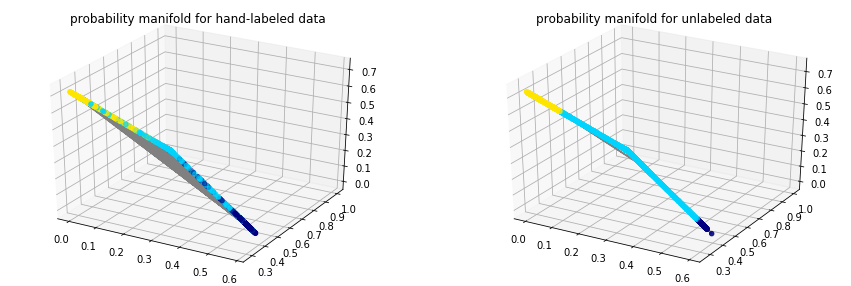

In [0]:

# calibrate the classifier
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(coords_valid, labels_valid)


# get the label probabilities for test data
sig_clf_probs = sig_clf.predict_proba(coords_test)
sig_score = log_loss(labels_test, sig_clf_probs,labels=np.unique(point_labels))
print("log loss score for a probability calibrated model: {}".format(sig_score))

# get the label probabilities for completely novel data
calibrated_prob_coords = sig_clf.predict_proba(unclassified_points.T)
calibrated_prob_coords_labels=np.argmax(calibrated_prob_coords.T,axis=0)


fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121, projection='3d')
ax.plot3D(sig_clf_probs.T[0,:], sig_clf_probs.T[1,:], sig_clf_probs.T[2,:], 'gray')
ax.scatter3D(sig_clf_probs.T[0,:], sig_clf_probs.T[1,:], sig_clf_probs.T[2,:], c=labels_test, cmap='jet', vmin=0, vmax=Nwells);
ax.set_title('probability manifold for hand-labeled data')                             


ax = fig.add_subplot(122, projection='3d')
ax.plot3D(calibrated_prob_coords.T[0,:], calibrated_prob_coords.T[1,:], calibrated_prob_coords.T[2,:], 'gray')
ax.scatter3D(calibrated_prob_coords.T[0,:], calibrated_prob_coords.T[1,:], calibrated_prob_coords.T[2,:], c=calibrated_prob_coords_labels, cmap='jet', vmin=0, vmax=Nwells);  
ax.set_title('probability manifold for unlabeled data')                                                        
                             